In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import seaborn as sns
pd.set_option('display.max_columns', None)

In [19]:
ablation_directory = '/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.synthetic_data_linear/linear/varying_heritability_n_train'

folder_names = [folder for folder in os.listdir(ablation_directory) if os.path.isdir(os.path.join(ablation_directory, folder))]
experiments_seeds = []
for folder_name in folder_names:
    experiments_seeds.append(int(folder_name[4:]))
combined_df = pd.DataFrame()
for seed in experiments_seeds:
    df = pd.read_csv(os.path.join(ablation_directory, f"seed{seed}/results.csv"))
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# rf_plus_directory = f'/scratch/users/zhongyuan_liang/saved_models/auroc/linear/'
# combined_df_rf_plus = pd.DataFrame()
# for file in os.listdir(rf_plus_directory):
#     if file.endswith(".csv"):
#         df = pd.read_csv(os.path.join(rf_plus_directory, file))
#         combined_df_rf_plus = pd.concat([combined_df_rf_plus, df], ignore_index=True)

In [20]:
combined_df

,rep,n_train,n_train_name,heritability,heritability_name,n_estimators,min_samples_leaf,max_features,random_state,model,fi,train_size,train_subset_size,test_size,test_subset_size,num_features,data_split_seed,sample_train_0,sample_train_1,sample_train_2,sample_train_3,sample_train_4,sample_train_5,sample_train_6,sample_train_7,sample_train_8,sample_train_9,sample_train_10,sample_train_11,sample_train_12,sample_train_13,sample_train_14,sample_train_15,sample_train_16,sample_train_17,sample_train_18,sample_train_19,sample_train_20,sample_train_21,sample_train_22,sample_train_23,sample_train_24,sample_train_25,sample_train_26,sample_train_27,sample_train_28,sample_train_29,sample_train_30,sample_train_31,sample_train_32,sample_train_33,sample_train_34,sample_train_35,sample_train_36,sample_train_37,sample_train_38,sample_train_39,sample_train_40,sample_train_41,sample_train_42,sample_train_43,sample_train_44,sample_train_45,sample_train_46,sample_train_47,sample_train_48,sample_train_49,sample_train_50,sample_train_51,sample_train_52,sample_train_53,sample_train_54,sample_train_55,sample_train_56,sample_train_57,sample_train_58,sample_train_59,sample_train_60,sample_train_61,sample_train_62,sample_train_63,sample_train_64,sample_train_65,sample_train_66,sample_train_67,sample_train_68,sample_train_69,sample_train_70,sample_train_71,sample_train_72,sample_train_73,sample_train_74,sample_train_75,sample_train_76,sample_train_77,sample_train_78,sample_train_79,sample_train_80,sample_train_81,sample_train_82,sample_train_83,sample_train_84,sample_train_85,sample_train_86,sample_train_87,sample_train_88,sample_train_89,sample_train_90,sample_train_91,sample_train_92,sample_train_93,sample_train_94,sample_train_95,sample_train_96,sample_train_97,sample_train_98,sample_train_99,sample_test_0,sample_test_1,sample_test_2,sample_test_3,sample_test_4,sample_test_5,sample_test_6,sample_test_7,sample_test_8,sample_test_9,sample_test_10,sample_test_11,sample_test_12,sample_test_13,sample_test_14,sample_test_15,sample_test_16,sample_test_17,sample_test_18,sample_test_19,sample_test_20,sample_test_21,sample_test_22,sample_test_23,sample_test_24,sample_test_25,sample_test_26,sample_test_27,sample_test_28,sample_test_29,sample_test_30,sample_test_31,sample_test_32,sample_test_33,sample_test_34,sample_test_35,sample_test_36,sample_test_37,sample_test_38,sample_test_39,sample_test_40,sample_test_41,sample_test_42,sample_test_43,sample_test_44,sample_test_45,sample_test_46,sample_test_47,sample_test_48,sample_test_49,sample_test_50,sample_test_51,sample_test_52,sample_test_53,sample_test_54,sample_test_55,sample_test_56,sample_test_57,sample_test_58,sample_test_59,sample_test_60,sample_test_61,sample_test_62,sample_test_63,sample_test_64,sample_test_65,sample_test_66,sample_test_67,sample_test_68,sample_test_69,sample_test_70,sample_test_71,sample_test_72,sample_test_73,sample_test_74,sample_test_75,sample_test_76,sample_test_77,sample_test_78,sample_test_79,sample_test_80,sample_test_81,sample_test_82,sample_test_83,sample_test_84,sample_test_85,sample_test_86,sample_test_87,sample_test_88,sample_test_89,sample_test_90,sample_test_91,sample_test_92,sample_test_93,sample_test_94,sample_test_95,sample_test_96,sample_test_97,sample_test_98,sample_test_99,load_model_time,auroc_train_subset,rbo_09_train_subset,partial_auroc_train_subset_0,partial_auroc_train_subset_1,partial_auroc_train_subset_2,partial_auroc_train_subset_3,partial_auroc_train_subset_4,auroc_test_subset,rbo_09_test_subset,partial_auroc_test_subset_0,partial_auroc_test_subset_1,partial_auroc_test_subset_2,partial_auroc_test_subset_3,partial_auroc_test_subset_4,auroc_test,rbo_09_test,partial_auroc_test_0,partial_auroc_test_1,partial_auroc_test_2,partial_auroc_test_3,partial_auroc_test_4,split_seed
0,0,100,100,0.1,0.1,100,5,0.33,42,RF,Kernel_SHAP_RF_plus,100,100,300,100,10,2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,

##### Report RF Plus Performance

In [21]:
# result = combined_df_rf_plus.groupby(['n_train', 'heritability', 'Model']).mean()

In [22]:
# result.loc[1000]

In [23]:
# result2 = combined_df_rf_plus.groupby(['heritability', 'n_train', 'Model']).mean()

In [24]:
# result2.loc[0.8]

##### Plot AUROC/RBO Performance

In [25]:
combined_df["train_size"].unique()

array([100, 250, 750])

In [26]:
combined_df["test_size"].unique()

array([300])

In [27]:
columns = ['train_size', 'rbo_09_train_subset', 'rbo_09_test_subset', 'rbo_09_test',  'auroc_train_subset','auroc_test_subset', 'auroc_test']
for k in range(5):
    columns.append(f'partial_auroc_train_subset_{k}')
    columns.append(f'partial_auroc_test_subset_{k}')
    columns.append(f'partial_auroc_test_{k}')

In [28]:
combined_df

,rep,n_train,n_train_name,heritability,heritability_name,n_estimators,min_samples_leaf,max_features,random_state,model,fi,train_size,train_subset_size,test_size,test_subset_size,num_features,data_split_seed,sample_train_0,sample_train_1,sample_train_2,sample_train_3,sample_train_4,sample_train_5,sample_train_6,sample_train_7,sample_train_8,sample_train_9,sample_train_10,sample_train_11,sample_train_12,sample_train_13,sample_train_14,sample_train_15,sample_train_16,sample_train_17,sample_train_18,sample_train_19,sample_train_20,sample_train_21,sample_train_22,sample_train_23,sample_train_24,sample_train_25,sample_train_26,sample_train_27,sample_train_28,sample_train_29,sample_train_30,sample_train_31,sample_train_32,sample_train_33,sample_train_34,sample_train_35,sample_train_36,sample_train_37,sample_train_38,sample_train_39,sample_train_40,sample_train_41,sample_train_42,sample_train_43,sample_train_44,sample_train_45,sample_train_46,sample_train_47,sample_train_48,sample_train_49,sample_train_50,sample_train_51,sample_train_52,sample_train_53,sample_train_54,sample_train_55,sample_train_56,sample_train_57,sample_train_58,sample_train_59,sample_train_60,sample_train_61,sample_train_62,sample_train_63,sample_train_64,sample_train_65,sample_train_66,sample_train_67,sample_train_68,sample_train_69,sample_train_70,sample_train_71,sample_train_72,sample_train_73,sample_train_74,sample_train_75,sample_train_76,sample_train_77,sample_train_78,sample_train_79,sample_train_80,sample_train_81,sample_train_82,sample_train_83,sample_train_84,sample_train_85,sample_train_86,sample_train_87,sample_train_88,sample_train_89,sample_train_90,sample_train_91,sample_train_92,sample_train_93,sample_train_94,sample_train_95,sample_train_96,sample_train_97,sample_train_98,sample_train_99,sample_test_0,sample_test_1,sample_test_2,sample_test_3,sample_test_4,sample_test_5,sample_test_6,sample_test_7,sample_test_8,sample_test_9,sample_test_10,sample_test_11,sample_test_12,sample_test_13,sample_test_14,sample_test_15,sample_test_16,sample_test_17,sample_test_18,sample_test_19,sample_test_20,sample_test_21,sample_test_22,sample_test_23,sample_test_24,sample_test_25,sample_test_26,sample_test_27,sample_test_28,sample_test_29,sample_test_30,sample_test_31,sample_test_32,sample_test_33,sample_test_34,sample_test_35,sample_test_36,sample_test_37,sample_test_38,sample_test_39,sample_test_40,sample_test_41,sample_test_42,sample_test_43,sample_test_44,sample_test_45,sample_test_46,sample_test_47,sample_test_48,sample_test_49,sample_test_50,sample_test_51,sample_test_52,sample_test_53,sample_test_54,sample_test_55,sample_test_56,sample_test_57,sample_test_58,sample_test_59,sample_test_60,sample_test_61,sample_test_62,sample_test_63,sample_test_64,sample_test_65,sample_test_66,sample_test_67,sample_test_68,sample_test_69,sample_test_70,sample_test_71,sample_test_72,sample_test_73,sample_test_74,sample_test_75,sample_test_76,sample_test_77,sample_test_78,sample_test_79,sample_test_80,sample_test_81,sample_test_82,sample_test_83,sample_test_84,sample_test_85,sample_test_86,sample_test_87,sample_test_88,sample_test_89,sample_test_90,sample_test_91,sample_test_92,sample_test_93,sample_test_94,sample_test_95,sample_test_96,sample_test_97,sample_test_98,sample_test_99,load_model_time,auroc_train_subset,rbo_09_train_subset,partial_auroc_train_subset_0,partial_auroc_train_subset_1,partial_auroc_train_subset_2,partial_auroc_train_subset_3,partial_auroc_train_subset_4,auroc_test_subset,rbo_09_test_subset,partial_auroc_test_subset_0,partial_auroc_test_subset_1,partial_auroc_test_subset_2,partial_auroc_test_subset_3,partial_auroc_test_subset_4,auroc_test,rbo_09_test,partial_auroc_test_0,partial_auroc_test_1,partial_auroc_test_2,partial_auroc_test_3,partial_auroc_test_4,split_seed
0,0,100,100,0.1,0.1,100,5,0.33,42,RF,Kernel_SHAP_RF_plus,100,100,300,100,10,2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,

In [29]:
result_df = combined_df.groupby(['n_train', 'heritability', 'fi'])[columns].mean().reset_index()


In [30]:
heritability_01_df = result_df[result_df['heritability'] == 0.1]
heritability_02_df = result_df[result_df['heritability'] == 0.2]
heritability_04_df = result_df[result_df['heritability'] == 0.4]
heritability_08_df = result_df[result_df['heritability'] == 0.8]
n_train_100_df = result_df[result_df['n_train'] == 100]
n_train_250_df = result_df[result_df['n_train'] == 250]
n_train_750_df = result_df[result_df['n_train'] == 750]

In [31]:
methods = ['Kernel_SHAP_RF_plus', 
           'LIME_RF_plus',
            'Local_MDI+_fit_on_OOB_RFPlus_l2_norm',  # Orange
            # 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_l2_norm',  # Green
            # 'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_l2_norm',
            #'Local_MDI+_fit_on_OOB_RFPlus',  # Orange
            # 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus',  # Green
            # 'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus',
            'Random',
            'TreeSHAP_RF']

In [32]:
# method_colors = {
#     'Kernel_SHAP_RF_plus': '#1f77b4',  # Blue
#     'Local_MDI+_fit_on_OOB_RFPlus_l2_norm': '#ff7f0e',  # Orange
#     #'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_l2_norm': '#2ca02c',  # Green
#     'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_l2_norm': '#9467bd',  # Purple
#     'LIME_RF_plus': '#8c564b',  # Brown
#     'TreeSHAP_RF': '#e377c2',  # Pink
#     # 'Random': '#7f7f7f',  # Gray
# }
method_colors = {
    'Kernel_SHAP_RF_plus': '#1f77b4',  # Blue
    'LIME_RF_plus': '#8c564b',  # Brown
    'Local_MDI+_fit_on_OOB_RFPlus_l2_norm': '#ff7f0e',  # Orange
    'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_l2_norm': '#2ca02c',  # Green
    'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_l2_norm': '#9467bd',  # Purple
    'Local_MDI+_fit_on_OOB_RFPlus': '#ffbb78',  # Light Orange
    'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus': '#98df8a',  # Light Green
    'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus': '#c5b0d5',  # Light Purple
    'Random': '#7f7f7f',  # Gray
    'TreeSHAP_RF': '#e377c2',  # Pink
}


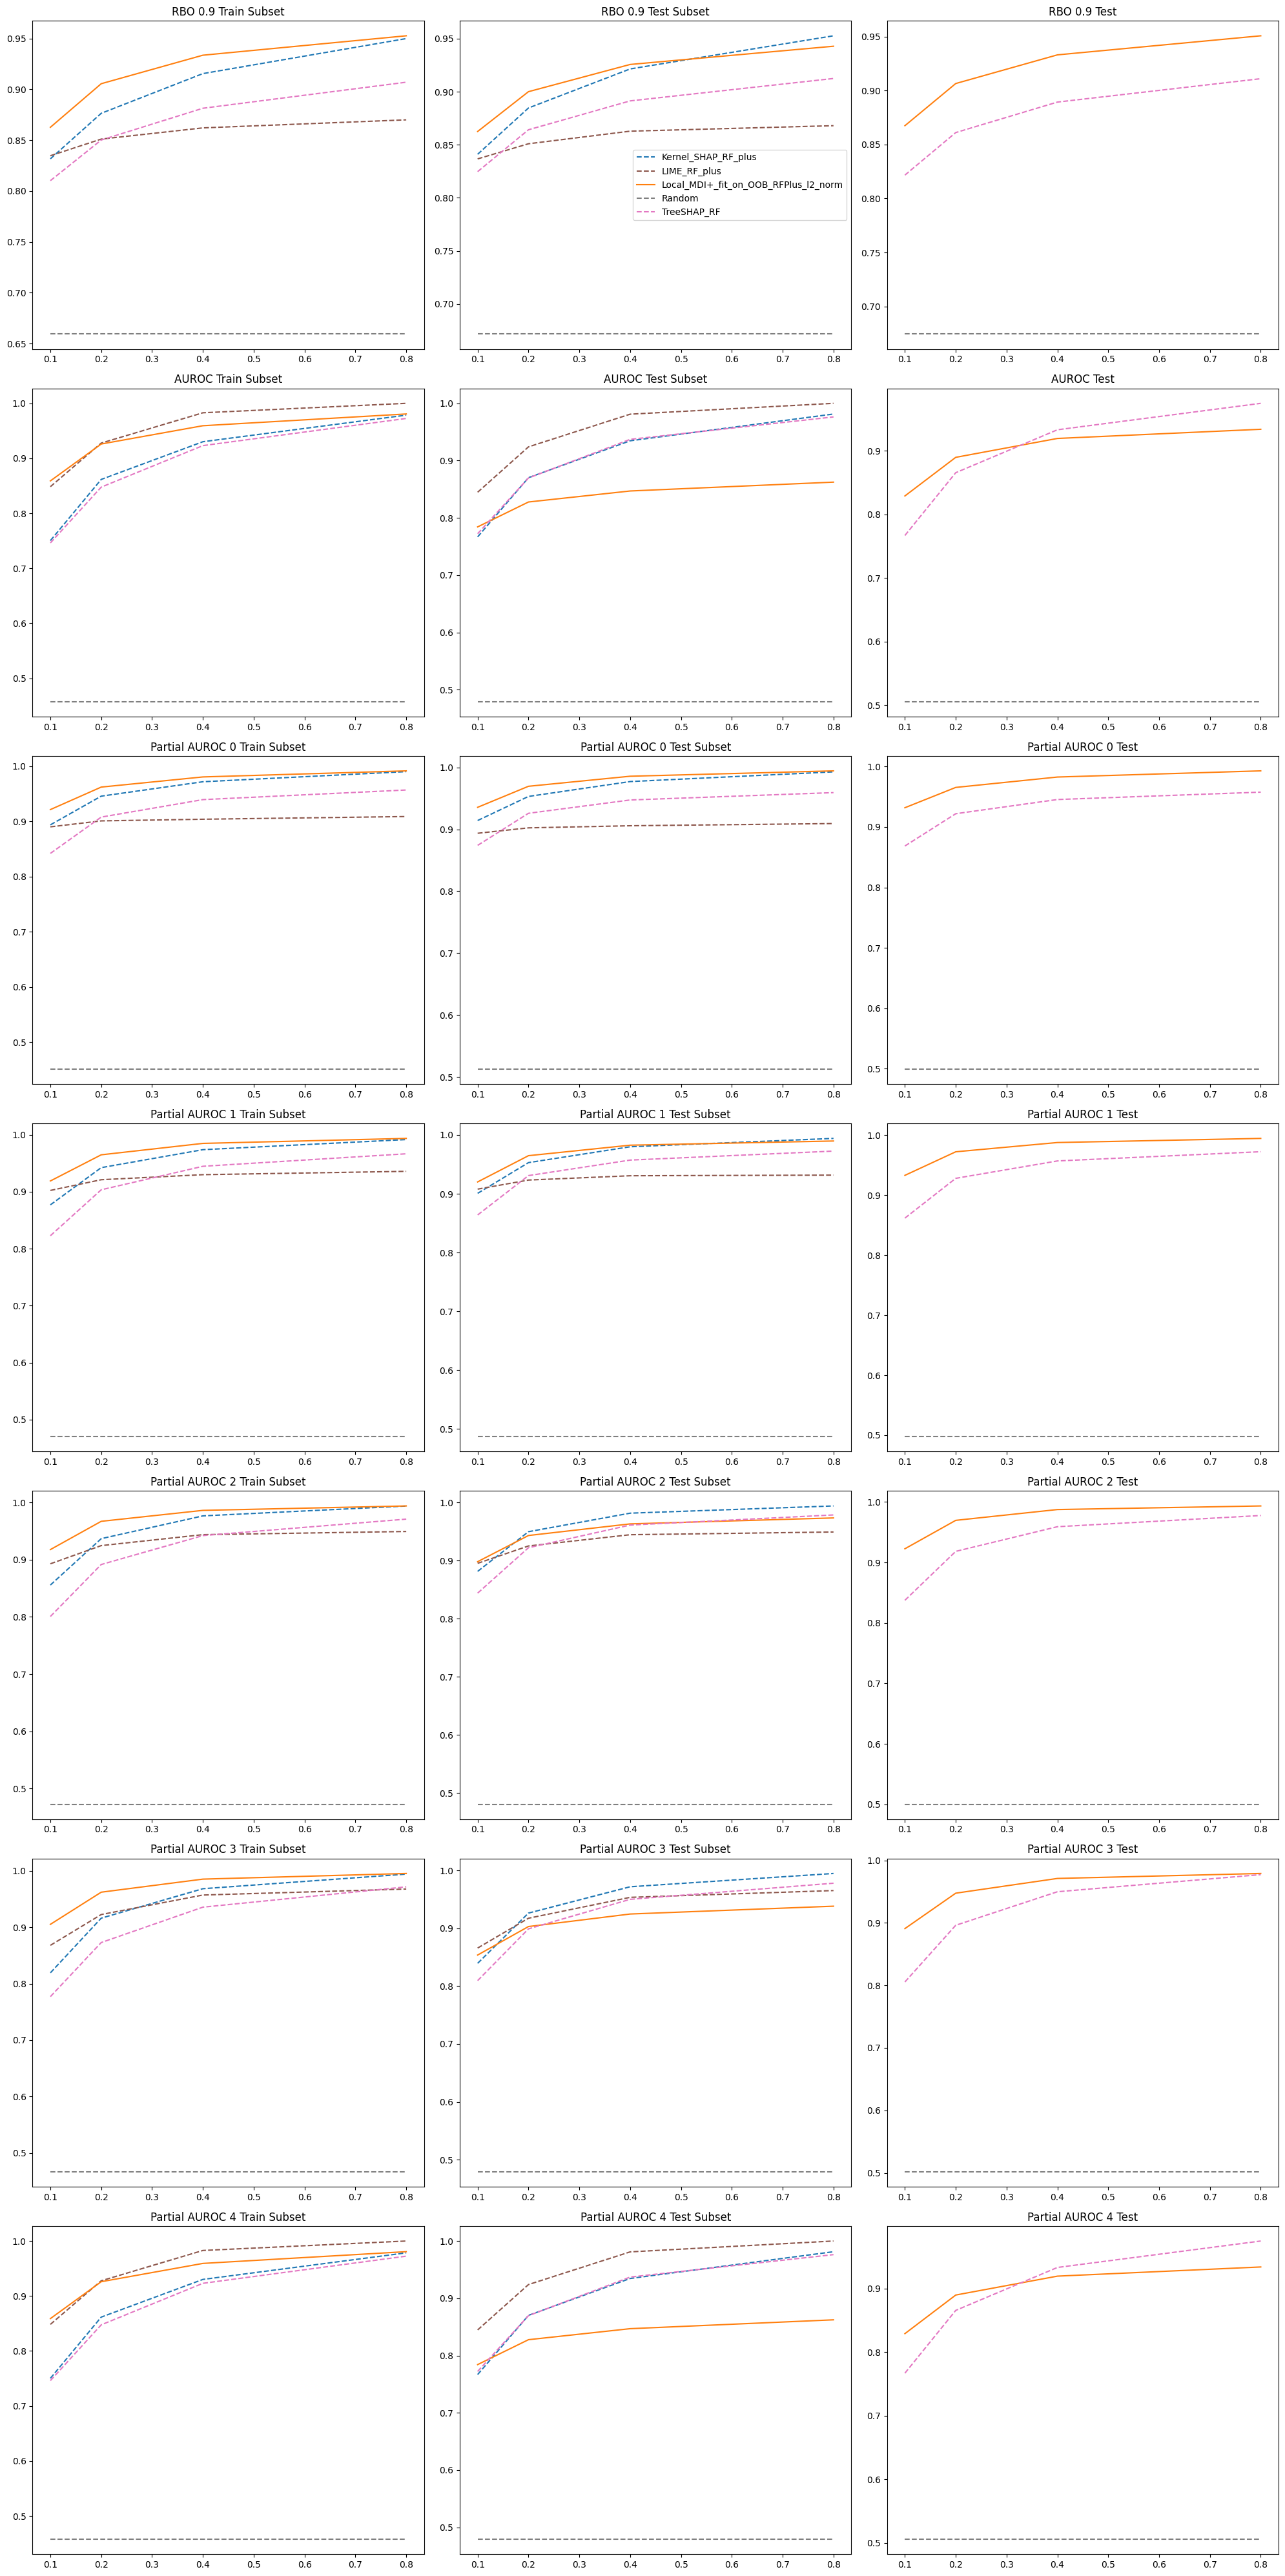

In [36]:
fig, axes = plt.subplots(7, 3, figsize=(20, 40))

# Define the DataFrame
df = n_train_750_df

dotted_methods = ['Random', 'Kernel_SHAP_RF_plus', 'LIME_RF_plus', 'TreeSHAP_RF']

# Iterate over the methods and plot each subplot
for method in methods:
    subset = df[df['fi'] == method]
    
    # Set line style based on method
    linestyle = '--' if method in dotted_methods else '-'
    
    axes[0, 0].plot(subset['heritability'], subset['rbo_09_train_subset'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[0, 1].plot(subset['heritability'], subset['rbo_09_test_subset'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[0, 2].plot(subset['heritability'], subset['rbo_09_test'], label=method, linestyle=linestyle, color=method_colors[method])  # New column for test

    axes[1, 0].plot(subset['heritability'], subset['auroc_train_subset'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[1, 1].plot(subset['heritability'], subset['auroc_test_subset'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[1, 2].plot(subset['heritability'], subset['auroc_test'], label=method, linestyle=linestyle, color=method_colors[method])  # New column for test

    axes[2, 0].plot(subset['heritability'], subset['partial_auroc_train_subset_0'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[2, 1].plot(subset['heritability'], subset['partial_auroc_test_subset_0'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[2, 2].plot(subset['heritability'], subset['partial_auroc_test_0'], label=method, linestyle=linestyle, color=method_colors[method])  # New column for test

    axes[3, 0].plot(subset['heritability'], subset['partial_auroc_train_subset_1'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[3, 1].plot(subset['heritability'], subset['partial_auroc_test_subset_1'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[3, 2].plot(subset['heritability'], subset['partial_auroc_test_1'], label=method, linestyle=linestyle, color=method_colors[method])  # New column for test

    axes[4, 0].plot(subset['heritability'], subset['partial_auroc_train_subset_2'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[4, 1].plot(subset['heritability'], subset['partial_auroc_test_subset_2'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[4, 2].plot(subset['heritability'], subset['partial_auroc_test_2'], label=method, linestyle=linestyle, color=method_colors[method])  # New column for test

    axes[5, 0].plot(subset['heritability'], subset['partial_auroc_train_subset_3'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[5, 1].plot(subset['heritability'], subset['partial_auroc_test_subset_3'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[5, 2].plot(subset['heritability'], subset['partial_auroc_test_3'], label=method, linestyle=linestyle, color=method_colors[method])  # New column for test

    axes[6, 0].plot(subset['heritability'], subset['partial_auroc_train_subset_4'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[6, 1].plot(subset['heritability'], subset['partial_auroc_test_subset_4'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[6, 2].plot(subset['heritability'], subset['partial_auroc_test_4'], label=method, linestyle=linestyle, color=method_colors[method])  # New column for test

# Add the legend and titles
axes[0, 1].legend(loc='best')
axes[0, 0].set_title('RBO 0.9 Train Subset')
axes[0, 1].set_title('RBO 0.9 Test Subset')
axes[0, 2].set_title('RBO 0.9 Test')
axes[1, 0].set_title('AUROC Train Subset')
axes[1, 1].set_title('AUROC Test Subset')
axes[1, 2].set_title('AUROC Test')
axes[2, 0].set_title('Partial AUROC 0 Train Subset')
axes[2, 1].set_title('Partial AUROC 0 Test Subset')
axes[2, 2].set_title('Partial AUROC 0 Test')
axes[3, 0].set_title('Partial AUROC 1 Train Subset')
axes[3, 1].set_title('Partial AUROC 1 Test Subset')
axes[3, 2].set_title('Partial AUROC 1 Test')
axes[4, 0].set_title('Partial AUROC 2 Train Subset')
axes[4, 1].set_title('Partial AUROC 2 Test Subset')
axes[4, 2].set_title('Partial AUROC 2 Test')
axes[5, 0].set_title('Partial AUROC 3 Train Subset')
axes[5, 1].set_title('Partial AUROC 3 Test Subset')
axes[5, 2].set_title('Partial AUROC 3 Test')
axes[6, 0].set_title('Partial AUROC 4 Train Subset')
axes[6, 1].set_title('Partial AUROC 4 Test Subset')
axes[6, 2].set_title('Partial AUROC 4 Test')
plt.tight_layout()
plt.savefig(f"./auc_{750}.png")
plt.show()

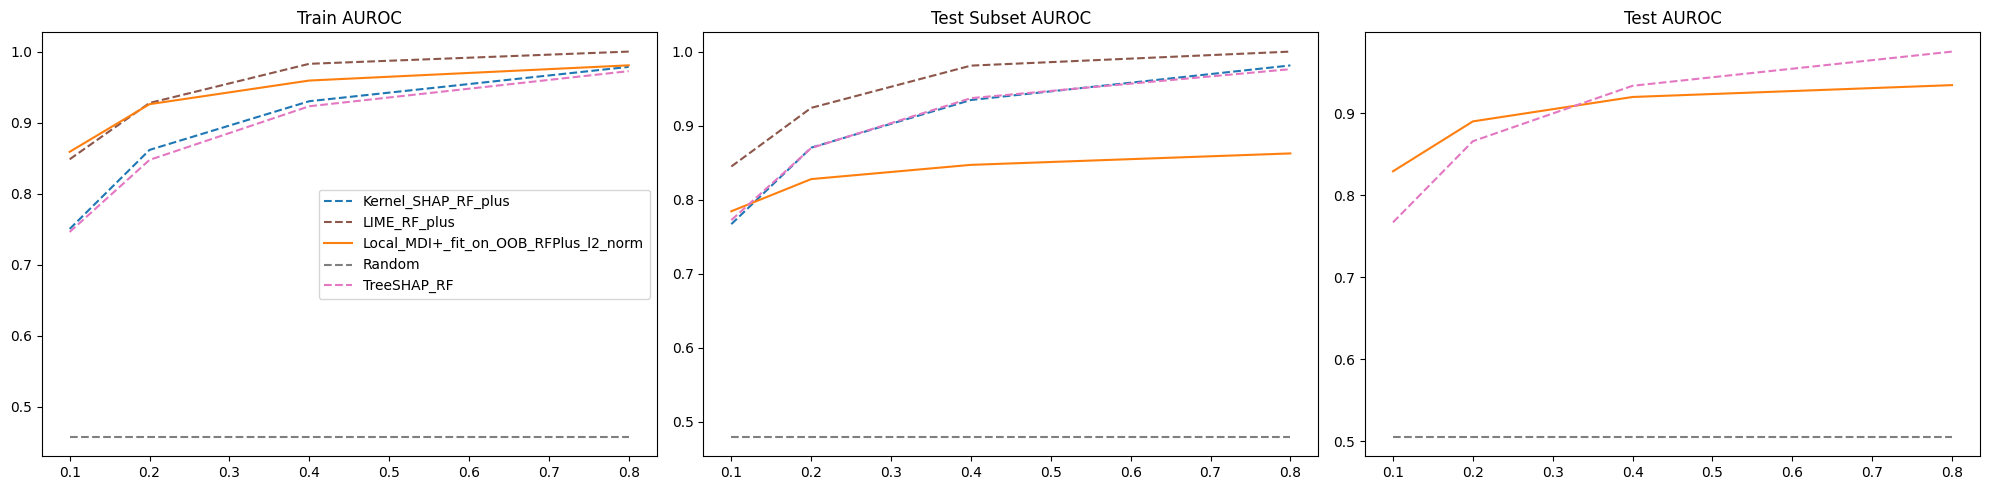

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Define the DataFrame
df = n_train_750_df

dotted_methods = ['Random', 'Kernel_SHAP_RF_plus', 'LIME_RF_plus', 'TreeSHAP_RF']

# Iterate over the methods and plot each subplot
for method in methods:
    subset = df[df['fi'] == method]
    
    # Set line style based on method
    linestyle = '--' if method in dotted_methods else '-'
    
    axes[0].plot(subset['heritability'], subset['auroc_train_subset'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[1].plot(subset['heritability'], subset['auroc_test_subset'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[2].plot(subset['heritability'], subset['auroc_test'], label=method, linestyle=linestyle, color=method_colors[method])

    # axes[2, 0].plot(subset['heritability'], subset['rbo_095_train_subset'], label=method, linestyle=linestyle, color=method_colors[method])
    # axes[2, 1].plot(subset['heritability'], subset['rbo_095_test_subset'], label=method, linestyle=linestyle, color=method_colors[method])

# Add the legend and titles
axes[0].legend(loc='best')
axes[0].set_title('Train AUROC')
axes[1].set_title('Test Subset AUROC')
axes[2].set_title('Test AUROC')
# axes[0, 1].set_title('Test rbo_06')
# axes[1, 0].set_title('Train rbo_09')
# axes[1, 1].set_title('Test rbo_09')
# axes[2, 0].set_title('Train rbo_095')
# axes[2, 1].set_title('Test rbo_095')

plt.tight_layout()
plt.savefig(f"./auc_{750}.png")
plt.show()

KeyError: 'num_captured_train_subset_0'

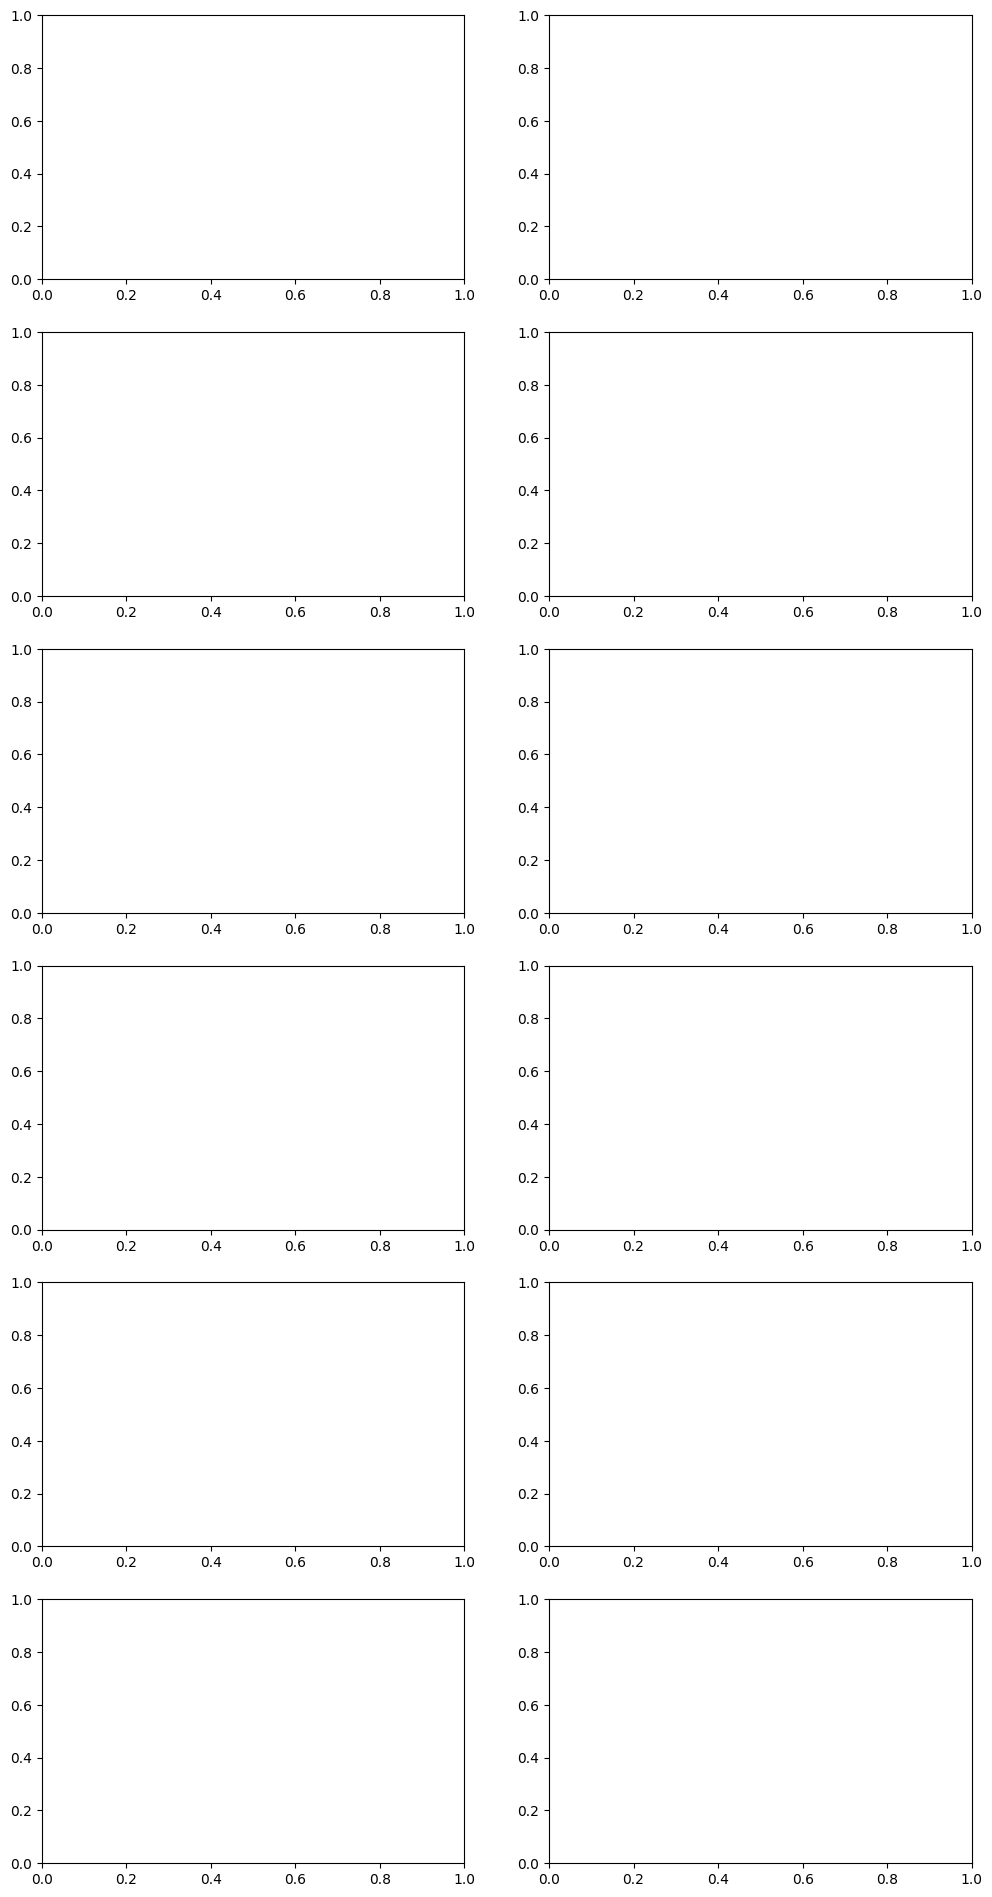

In [35]:
fig, axes = plt.subplots(6, 2, figsize=(12, 24))

# Define the DataFrame
df = heritability_01_df

dotted_methods = ['Random', 'Kernel_SHAP_RF_plus', 'LIME_RF_plus', 'TreeSHAP_RF']

# Iterate over the methods and plot each subplot
for method in methods:
    subset = df[df['fi'] == method]
    
    # Set line style based on method
    linestyle = '--' if method in dotted_methods else '-'
    
    axes[0,0].plot(subset['train_size'], subset['num_captured_train_subset_0'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[0,1].plot(subset['train_size'], subset['num_captured_test_subset_0'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[1,0].plot(subset['train_size'], subset['num_captured_train_subset_1'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[1,1].plot(subset['train_size'], subset['num_captured_test_subset_1'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[2,0].plot(subset['train_size'], subset['num_captured_train_subset_2'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[2,1].plot(subset['train_size'], subset['num_captured_test_subset_2'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[3,0].plot(subset['train_size'], subset['num_captured_train_subset_3'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[3,1].plot(subset['train_size'], subset['num_captured_test_subset_3'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[4,0].plot(subset['train_size'], subset['num_captured_train_subset_4'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[4,1].plot(subset['train_size'], subset['num_captured_test_subset_4'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[5,0].plot(subset['train_size'], subset['num_captured_train_subset_5'], label=method, linestyle=linestyle, color=method_colors[method])
    axes[5,1].plot(subset['train_size'], subset['num_captured_test_subset_5'], label=method, linestyle=linestyle, color=method_colors[method])

axes[0,1].legend(loc='best')
axes[0,0].set_title('Train num_captured_0')
axes[0,1].set_title('Test num_captured_0')
axes[1,0].set_title('Train num_captured_1')
axes[1,1].set_title('Test num_captured_1')
axes[2,0].set_title('Train num_captured_2')
axes[2,1].set_title('Test num_captured_2')
axes[3,0].set_title('Train num_captured_3')
axes[3,1].set_title('Test num_captured_3')
axes[4,0].set_title('Train num_captured_4')
axes[4,1].set_title('Test num_captured_4')
axes[5,0].set_title('Train num_captured_5')
axes[5,1].set_title('Test num_captured_5')

plt.tight_layout()
plt.show()